<a href="https://colab.research.google.com/github/bhuvighosh3/ML-Compute/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression
Implementing Linear Regression for predicting profit of a food truck given the population and profits of different cities


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
import math
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [ ]:
#in dataset both tye column has values in multiple of 10k

### Reading the dataset

In [ ]:
#load dataset
df=pd.read_csv('/content/Data1.txt',names=['Population','Profit'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [ ]:
df.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [ ]:
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### Scatter plot of Population vs Profit

In [ ]:
#plot

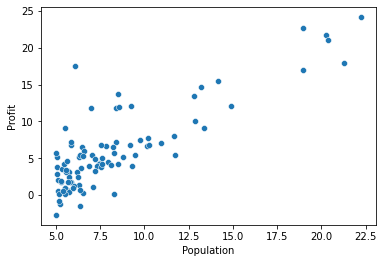

In [ ]:
sns.scatterplot(x='Population',y='Profit',data=df)

In [ ]:
X=df['Population']
y=df['Profit']

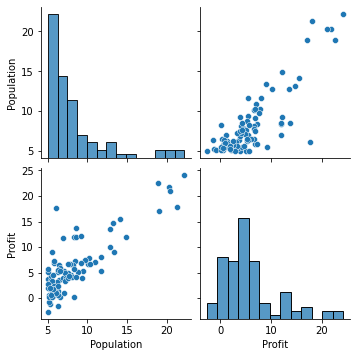

In [ ]:
sns.pairplot(df)

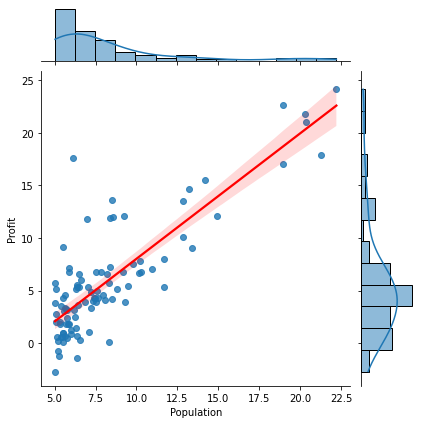

In [ ]:
sns.jointplot(x='Population',y='Profit',data=df,kind='reg',line_kws={'color': 'red'})

### Scikitlearn implementation:

In [ ]:
#fit the model
X=df[['Population']]
y=df['Profit']

In [ ]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=100)
print(f"Total length is {len(X)}")
print(f"Length of train sample is {len(X_train)}")
print(f"Length of test sample is {len(X_test)}")
model= LinearRegression(fit_intercept=True, normalize=True)

Total length is 97
Length of train sample is 77
Length of test sample is 20


In [ ]:
'''
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)
'''

'\nfrom sklearn.preprocessing import StandardScaler\nsc=StandardScaler()\nX_train=sc.fit_transform(X_train)\nX_test=sc.fit_transform(X_test)\n'

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [ ]:
#predict the target values

In [ ]:
pred=model.predict(X_test)
pred

array([ 3.65948755,  2.13450129, 11.08736877, 21.84650949,  2.99156009,
        2.4541195 ,  5.47012182,  5.34537317,  2.66608891, 20.78608858,
        5.98598676,  6.9790411 , 12.62061805,  2.31984542, 11.48674808,
        3.10288134,  5.6566136 ,  3.88006428,  3.84333975,  7.57638859])

In [ ]:
#evalute the model

In [ ]:
trainscore= model.score(X_train,y_train)
testscore= model.score(X_test,y_test)
print(trainscore)
print(testscore)

0.6350716459721844
0.8098970597821641


In [ ]:
MSE=mean_squared_error(y_test, pred)
RMSE= math.sqrt(MSE)
MAE=mean_absolute_error(y_test, pred)
r2=r2_score(y_test, pred)

In [ ]:
n=len(X_train)
k=X_train.shape[1]

In [ ]:
adjustedr2= 1- (1-r2)*(n-1)/(n-k-1)

In [ ]:
metrices=['MSE','RMSE','MAE','r2','Adjusted r2']
value=[MSE,RMSE,MAE,r2,adjustedr2]
pd.DataFrame({'Metrice':metrices,'Score':value})

,Metrice,Score
0,MSE,8.794904
1,RMSE,2.965620
2,MAE,2.514677
3,r2,0.809897
4,Adjusted r2,0.807362




---





---





---



In [ ]:
df1=df.iloc[:,:]

In [ ]:
df1.insert(0,'Ones',1)

In [ ]:
df1.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


### Function to compute the cost function 

In [ ]:
### Function to compute the cost function 

In [ ]:
def computeCost(X, y, theta):
    inner_product = np.power(((X * theta.T) - y) , 2)
    return np.sum(inner_product) / (2 * len(X))

### Set training data (X) and target variable (y)

In [ ]:
X=df1.iloc[:,:2].values
y=df1['Profit'].values

### Converting dataframe to numpy matrices and creating a parameter (theta) matrix

In [ ]:
#converting X,y into numpy matrix
X=np.matrix(X.values)
y=np.matrix(y.values)

AttributeError: ignored

In [ ]:
#converting theta into numpy matrix
# take initial values as [0,0] for theta
theta=np.matrix(np.array([0,0]))

In [ ]:
computeCost(X,y,theta)

### Function to perform gradient descent on parameters theta by repeatedly updating the parameters

In [ ]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    for i in range(iters):
      error=(X*theta.T)-y_test
      for j in range(parameters):
        terms=np.multiply(error,X[:,j])
        temp[0,j]=theta[0,j]-((alpha/len(X))*np.sum(term))
        theta=temp
        cost[i]=computeCost(X,y,theta)
    # With each iteration, we are calculating the changes to be made to the
    # parameter (theta) value to reduce the error (cost)

        # number of parameters to be calculated,here we have 2 parameters theta [0,0] and theta [0,1]  
    return theta, cost

In [ ]:
#X.shape

In [ ]:
#theta.shape

In [ ]:
#X*theta.T -y

### Set values for learning rate and number of iterations
- alpha here denotes the learning rate that helps to determine how quickly the algorithm
    will converge to the optimal solution
- iters denotes the number of iterations

In [ ]:
alpha=0.01
iters=1000

In [ ]:
g,cost= gradientDescent(X,y,theta,alpha,iters)




### Using Matplotlib library to visualize our solution using scatter plot

In [ ]:
# linspace function will create an evenly-spaced series of points within the range of our data
x = np.linspace(df.Population.min(), df.Population.max(), 100)  
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(10, 7))  
ax.plot(x, f, 'r', label='Prediction')  
ax.scatter(df.Population, df.Profit, label='Traning Data')  
ax.legend(loc=2)  
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')  
ax.set_title('Predicted Profit vs. Population Size')

NameError: ignored

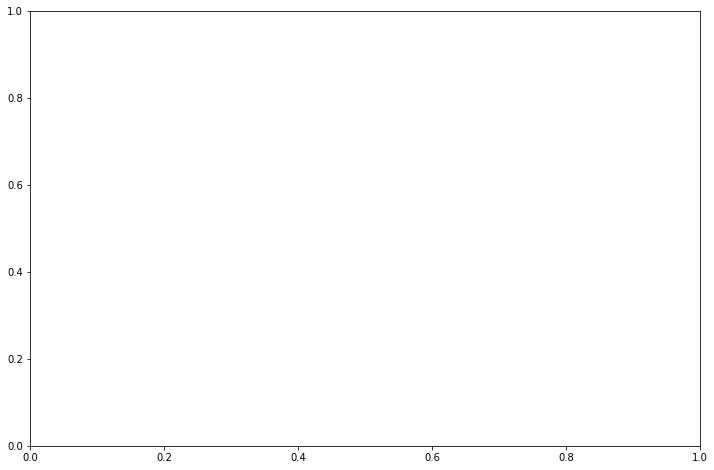

In [386]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs Training epoch')

SCIKIT LEARN IMPLEMENTATION

-Implement various type of errors,
 eg.Mean squared error,R_squared_score
choose best for the evaluting model,
and justify why it is best


In [ ]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=100)
print(f"Total length is {len(X)}")
print(f"Length of train sample is {len(X_train)}")
print(f"Length of test sample is {len(X_test)}")
model= LinearRegression(fit_intercept=True, normalize=True)

Total length is 97
Length of train sample is 77
Length of test sample is 20


In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [ ]:
pred=model.predict(X_test)
pred

array([ 3.65948755,  2.13450129, 11.08736877, 21.84650949,  2.99156009,
        2.4541195 ,  5.47012182,  5.34537317,  2.66608891, 20.78608858,
        5.98598676,  6.9790411 , 12.62061805,  2.31984542, 11.48674808,
        3.10288134,  5.6566136 ,  3.88006428,  3.84333975,  7.57638859])

In [ ]:
trainscore= model.score(X_train,y_train)
testscore= model.score(X_test,y_test)
print(trainscore)
print(testscore)

0.6350716459721845
0.8098970597821641


In [ ]:
MSE=mean_squared_error(y_test, pred)
RMSE= math.sqrt(MSE)
MAE=mean_absolute_error(y_test, pred)
r2=r2_score(y_test, pred)

In [ ]:
n=len(X_train)
k=X_train.shape[1]

In [ ]:
adjustedr2= 1- (1-r2)*(n-1)/(n-k-1)

In [ ]:
metrices=['MSE','RMSE','MAE','r2','Adjusted r2']
value=[MSE,RMSE,MAE,r2,adjustedr2]
pd.DataFrame({'Metrice':metrices,'Score':value})

,Metrice,Score
0,MSE,8.794904
1,RMSE,2.965620
2,MAE,2.514677
3,r2,0.809897
4,Adjusted r2,0.804759
